<a href="https://colab.research.google.com/github/julidoominguez/SeriesdeTiempoAustral/blob/main/TP_series_temporales_datos_climaticos_Moron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00


In [14]:
# manipulación de data frames y EDA
import pandas as pd
import numpy as np
from datetime import timedelta                                 # diferencia de dos fechas

# visualización
import matplotlib.pyplot as plt
import seaborn as sns

# paquetes estadísticos - modelado de series temporales
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import statsmodels.api as sm                                   # modelos estadísticos
# !pip install pmdarima
import pmdarima as pm                                          # modelado automático SARIMA
from statsmodels.tsa.arima_model import ARIMA                  # modelo ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX         # modelo SARIMAX
from pylab import rcParams                                     # descomposicion de series temporales
from statsmodels.tsa.stattools import adfuller, kpss           # test Dickey-Fuller y KPSS
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf  # plot the (P)ACF

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
!pip install gspread
!pip install gspread-dataframe
!pip install --upgrade gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [15]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1GWw8yNesP9cVktBnWaudd_XCGURI9HPd7bQNrvzoVFE/edit?gid=1987789933"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=')

# Leer los datos en un DataFrame de pandas
df_datos_clima_moron = pd.read_csv(csv_url)

print(df_datos_clima_moron.head())

   YEAR  DOY     FECHA  QV2M  RH2M  PRECTOTCORR  WS2M  T2M_MAX  T2M_MIN  \
0  2019  182  1/7/2019  4.15 77.62         0.00  3.04    12.30    -0.56   
1  2019  183  2/7/2019  4.76 73.00         0.00  4.06    14.77     3.75   
2  2019  184  3/7/2019  3.78 75.06         0.00  3.54    10.85     0.47   
3  2019  185  4/7/2019  3.66 75.38         0.00  3.65     9.83     0.64   
4  2019  186  5/7/2019  3.66 83.56         0.00  3.21     9.29    -0.81   

   ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DNI  \
0              11.98              11.90              27.50   
1               7.33              11.34               7.05   
2              11.65              11.70              24.42   
3              12.00              12.00              26.79   
4              11.76              11.91              24.80   

   ALLSKY_SFC_SW_DIFF  TOA_SW_DWN  ALLSKY_SFC_PAR_TOT  CLRSKY_SFC_PAR_TOT  \
0                1.78       16.00               58.35               59.01   
1                5.00 

In [ ]:
display(df_datos_clima_moron)

,YEAR,DOY,FECHA,QV2M,RH2M,PRECTOTCORR,WS2M,T2M_MAX,T2M_MIN,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
0,2019,182,1/7/2019,4.15,77.62,0.00,3.04,12.30,-0.56,11.98,11.90,27.50,1.78,16.00,58.35,59.01,7.02,0.08,0.41
1,2019,183,2/7/2019,4.76,73.00,0.00,4.06,14.77,3.75,7.33,11.34,7.05,5.00,16.04,38.37,58.25,5.32,0.07,0.33
2,2019,184,3/7/2019,3.78,75.06,0.00,3.54,10.85,0.47,11.65,11.70,24.42,2.33,16.09,57.29,58.58,6.95,0.07,0.37
3,2019,185,4/7/2019,3.66,75.38,0.00,3.65,9.83,0.64,12.00,12.00,26.79,1.93,16.15,58.41,59.50,7.05,0.07,0.38
4,2019,186,5/7/2019,3.66,83.56,0.00,3.21,9.29,-0.81,11.76,11.91,24.80,2.34,16.20,57.38,59.12,6.95,0.06,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,2024,179,27/6/2024,5.62,77.06,0.00,3.55,16.25,4.93,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
1824,2024,180,28/6/2024,4.58,74.44,0.00,4.24,12.17,2.44,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
1825,2024,181,29/6/2024,3.23,72.44,0.00,3.57,9.93,-0.69,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
1826,2024,182,30/6/2024,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [19]:
# URL de la hoja de Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1FSIizX5kpfBN14TNLekfFVNDO0dHJospR8aM0CNkQlg/edit?usp=sharing"

# Convertir la URL a un formato que pandas pueda leer
csv_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

# Leer los datos en un DataFrame de pandas
df_ventas_vitalcer = pd.read_csv(csv_url)

In [20]:
# Convertir la columna Monto a tipo numérico
df_ventas_vitalcer['Monto'] = df_ventas_vitalcer['Monto'].str.replace('$', '', regex=False)  # Eliminar símbolo de moneda
df_ventas_vitalcer['Monto'] = df_ventas_vitalcer['Monto'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)  # Reemplazar comas y puntos
df_ventas_vitalcer['Monto'] = df_ventas_vitalcer['Monto'].astype(float)  # Convertir a float

# Convertir la columna Fecha a tipo datetime
df_ventas_vitalcer['Fecha'] = pd.to_datetime(df_ventas_vitalcer['Fecha'], format='%d/%m/%Y')

In [21]:
# Asegurarse de que la columna 'FECHA' esté en formato de fecha en el DataFrame de datos climáticos
df_datos_clima_moron['FECHA'] = pd.to_datetime(df_datos_clima_moron['FECHA'], dayfirst=True)

# Asegurarse de que la columna 'RH2M' sea numérica
df_datos_clima_moron['RH2M'] = pd.to_numeric(df_datos_clima_moron['RH2M'], errors='coerce')

# Filtrar el DataFrame de datos climáticos para que contenga solo las fechas presentes en el DataFrame de facturación
df_filtered_humedad = df_datos_clima_moron[df_datos_clima_moron['FECHA'].isin(df_ventas_vitalcer['Fecha'])][['FECHA', 'RH2M']]

# Mostrar los primeros y últimos registros del DataFrame filtrado
print(df_filtered_humedad.head())
print(df_filtered_humedad.tail())

         FECHA  RH2M
137 2019-11-15 66.94
138 2019-11-16 75.19
141 2019-11-19 73.75
142 2019-11-20 69.25
143 2019-11-21 75.31
          FECHA  RH2M
1818 2024-06-22 92.94
1820 2024-06-24 81.62
1821 2024-06-25 85.44
1822 2024-06-26 82.25
1823 2024-06-27 77.06


In [ ]:
df_filtered_humedad.describe()

,FECHA,RH2M
count,1380,1380.00
mean,2022-03-11 04:16:41.739130368,68.79
min,2019-11-15 00:00:00,22.75
25%,2021-01-17 12:00:00,58.98
50%,2022-03-14 12:00:00,69.75
75%,2023-05-04 06:00:00,79.19
max,2024-06-27 00:00:00,95.81
std,NaN,13.58


In [ ]:
display(df_filtered_humedad)

,FECHA,RH2M
137,2019-11-15,66.94
138,2019-11-16,75.19
141,2019-11-19,73.75
142,2019-11-20,69.25
143,2019-11-21,75.31
...,...,...
1818,2024-06-22,92.94
1820,2024-06-24,81.62
1821,2024-06-25,85.44
1822,2024-06-26,82.25


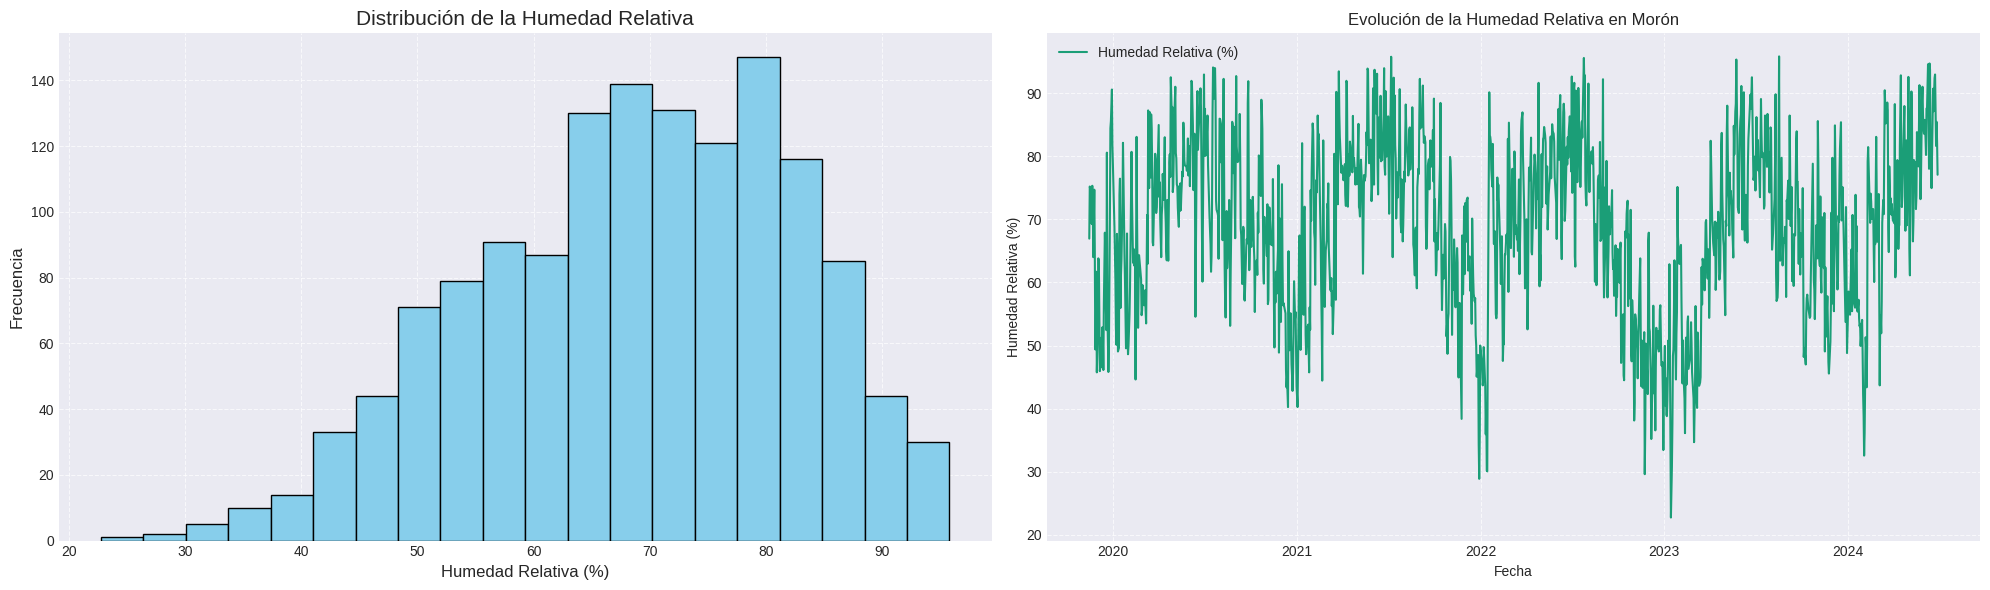

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Función para formatear los valores del eje
def format_func(value, tick_number):
    return f'{value:,.0f}'

# Función para graficar la serie
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.color_palette('Dark2'))
    xs = series['FECHA']
    ys = series['RH2M']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Establecer estilo de gráfico
plt.style.use('seaborn-darkgrid')

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico 1: Histograma
df_filtered_humedad['RH2M'].plot(kind='hist', bins=20, ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Distribución de la Humedad Relativa', fontsize=15)
ax1.set_xlabel('Humedad Relativa (%)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_major_formatter(FuncFormatter(format_func))
ax1.grid(True, linestyle='--', alpha=0.7)

# Gráfico 2: Serie temporal
df_sorted_humedad = df_filtered_humedad.sort_values('FECHA', ascending=True)
_plot_series(df_sorted_humedad, 'Humedad Relativa (%)')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Humedad Relativa (%)')
ax2.set_title('Evolución de la Humedad Relativa en Morón')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))
sns.despine(ax=ax2)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

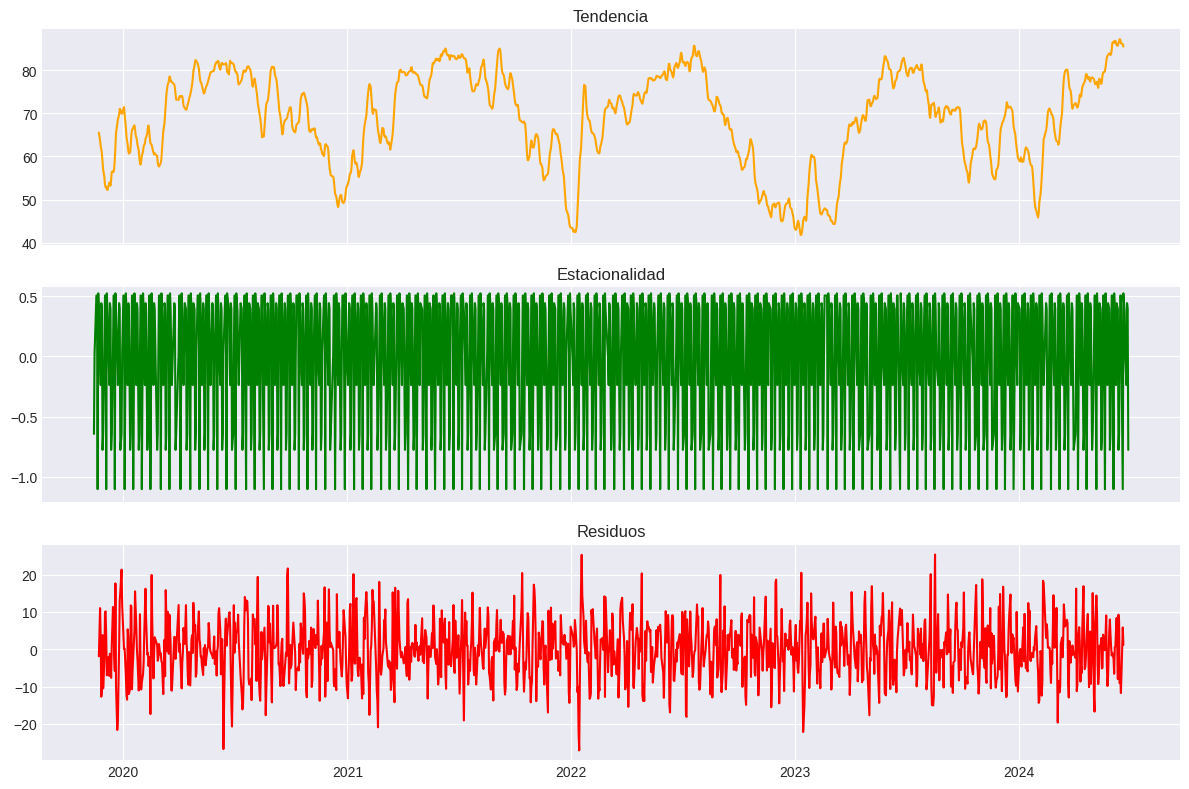

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'FECHA' sea el índice del DataFrame
df_filtered_humedad.set_index('FECHA', inplace=True)

# Realizar la descomposición de la serie temporal
decomposition = seasonal_decompose(df_filtered_humedad['RH2M'], model='additive', period=12)

# Graficar los componentes de la descomposición
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Tendencia
axs[0].plot(decomposition.trend, color='orange')
axs[0].set_title('Tendencia')
axs[0].legend().set_visible(False)

# Estacionalidad
axs[1].plot(decomposition.seasonal, color='green')
axs[1].set_title('Estacionalidad')
axs[1].legend().set_visible(False)

# Ajustar límites del eje Y para mejorar la visualización
axs[1].set_ylim([decomposition.seasonal.min() * 1.1, decomposition.seasonal.max() * 1.1])

# Residuos
axs[2].plot(decomposition.resid, color='red')
axs[2].set_title('Residuos')
axs[2].legend().set_visible(False)

plt.tight_layout()
plt.show()

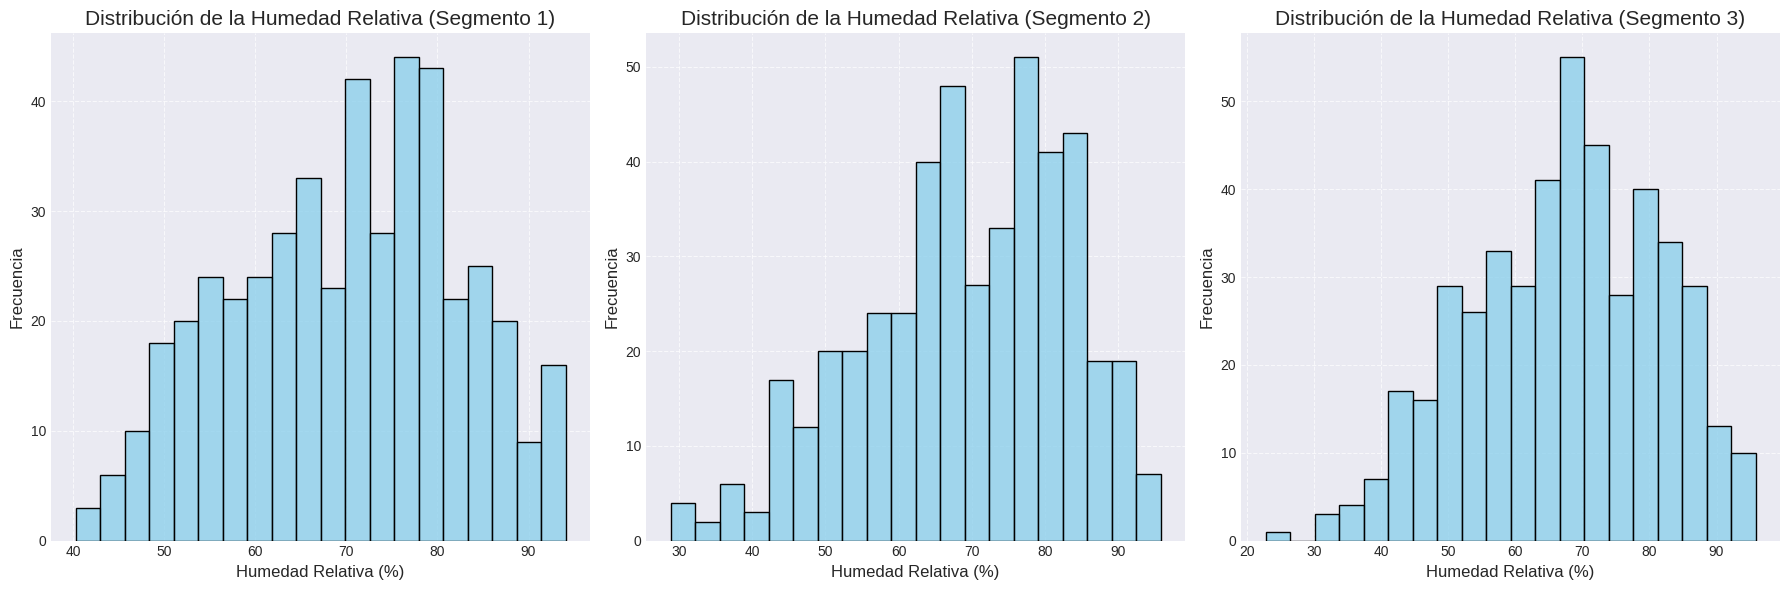

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores del eje X
def format_func(value, tick_number):
    return f'{value:,.0f}'

# Dividir el DataFrame en tres segmentos
n = len(df_filtered_humedad)
segment1 = df_filtered_humedad.iloc[:n//3]
segment2 = df_filtered_humedad.iloc[n//3:2*n//3]
segment3 = df_filtered_humedad.iloc[2*n//3:]

# Crear la figura y los ejes para los histogramas
fig, axs = plt.subplots(1, 3, figsize=(18, 6), layout='constrained')

# Graficar los histogramas
sns.histplot(segment1['RH2M'], bins=20, ax=axs[0], color='skyblue', edgecolor='black')
sns.histplot(segment2['RH2M'], bins=20, ax=axs[1], color='skyblue', edgecolor='black')
sns.histplot(segment3['RH2M'], bins=20, ax=axs[2], color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
axs[0].set_title('Distribución de la Humedad Relativa (Segmento 1)', fontsize=15)
axs[1].set_title('Distribución de la Humedad Relativa (Segmento 2)', fontsize=15)
axs[2].set_title('Distribución de la Humedad Relativa (Segmento 3)', fontsize=15)
for ax in axs:
    ax.set_xlabel('Humedad Relativa (%)', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)
    ax.xaxis.set_major_formatter(FuncFormatter(format_func))
    sns.despine(ax=ax)
    ax.grid(True, linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Index(['RH2M'], dtype='object')


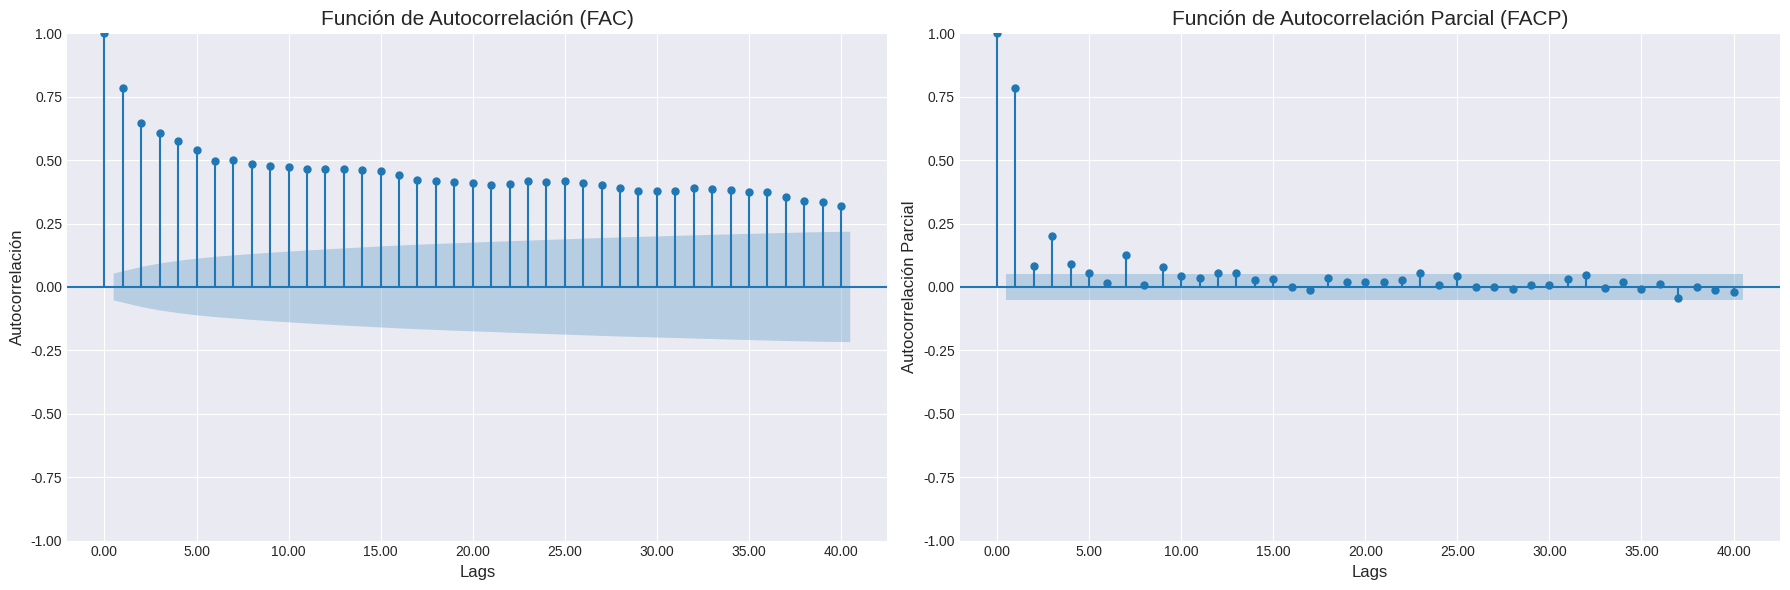

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores del eje Y
def format_func(value, tick_number):
    return f'{value:,.2f}'

# Verificar las columnas del DataFrame
print(df_filtered_humedad.columns)

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_filtered_humedad.sort_values('FECHA', ascending=True)

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

# Graficar FAC
plot_acf(df_sorted_humedad['RH2M'], ax=axs[0], lags=40, alpha=0.05)
axs[0].set_title('Función de Autocorrelación (FAC)', fontsize=15)
axs[0].set_xlabel('Lags', fontsize=12)
axs[0].set_ylabel('Autocorrelación', fontsize=12)
axs[0].xaxis.set_major_formatter(FuncFormatter(format_func))
axs[0].yaxis.set_major_formatter(FuncFormatter(format_func))
axs[0].tick_params(axis='both', which='major', labelsize=10)
sns.despine(ax=axs[0])

# Graficar FACP
plot_pacf(df_sorted_humedad['RH2M'], ax=axs[1], lags=40, alpha=0.05)
axs[1].set_title('Función de Autocorrelación Parcial (FACP)', fontsize=15)
axs[1].set_xlabel('Lags', fontsize=12)
axs[1].set_ylabel('Autocorrelación Parcial', fontsize=12)
axs[1].xaxis.set_major_formatter(FuncFormatter(format_func))
axs[1].yaxis.set_major_formatter(FuncFormatter(format_func))
axs[1].tick_params(axis='both', which='major', labelsize=10)
sns.despine(ax=axs[1])

# Ajustar el layout
plt.tight_layout()
plt.show()

In [22]:
!pip install arch
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_filtered_humedad.sort_values('FECHA', ascending=True)

# Extraer la serie
series_humedad = df_sorted_humedad['RH2M']

# Prueba de Dickey-Fuller aumentada (ADF)
adf_result_humedad = adfuller(series_humedad)
print('Prueba ADF para Humedad Relativa:')
print('Estadístico ADF:', adf_result_humedad[0])
print('Valor p:', adf_result_humedad[1])
print('Valores críticos:', adf_result_humedad[4])
print()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 7.4 MB/s eta 0:00:00
Prueba ADF para Humedad Relativa:
Estadístico ADF: -4.149903691597602
Valor p: 0.0008000625899887998
Valores críticos: {'1%': -3.4351427007691138, '5%': -2.863656619400241, '10%': -2.56789688724555}



In [ ]:
# Prueba Phillips-Perron (PP)
pp_result = PhillipsPerron(series_humedad)
pp_statistic = pp_result.stat
pp_p_value = pp_result.pvalue
pp_critical_values = pp_result.critical_values

print('Prueba Phillips-Perron para Humedad Relativa:')
print('Estadístico PP:', pp_statistic)
print('Valor p:', f'{pp_p_value:.30f}')
print('Valores críticos:', pp_critical_values)
print()

Prueba Phillips-Perron para Humedad Relativa:
Estadístico PP: -16.240781316042238
Valor p: 0.000000000000000000000000000037
Valores críticos: {'1%': -3.4351009168670035, '5%': -2.863638180853028, '10%': -2.5678870681532424}



In [ ]:
# Prueba KPSS
kpss_result_humedad = kpss(series_humedad, regression='c')
print('Prueba KPSS para Humedad Relativa:')
print('Estadístico KPSS:', kpss_result_humedad[0])
print('Valor p:', kpss_result_humedad[1])
print('Valores críticos:', kpss_result_humedad[3])
print()

Prueba KPSS para Humedad Relativa:
Estadístico KPSS: 0.21671588147110876
Valor p: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_filtered_humedad.sort_values('FECHA', ascending=True)

# Ajuste automático del modelo SARIMA con estacionalidad de 3 días (m=3)
sarima_model_humedad_m3 = auto_arima(df_sorted_humedad['RH2M'],
                                     seasonal=True, m=3,
                                     trace=True, error_action='ignore',
                                     suppress_warnings=True)

# Resumen del mejor modelo encontrado para m=3
print(sarima_model_humedad_m3.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=9691.384, Time=10.18 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=9950.520, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=9902.726, Time=1.07 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=9830.462, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=9948.521, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=9692.261, Time=4.61 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=9692.271, Time=4.71 sec
 ARIMA(2,1,2)(2,0,1)[3] intercept   : AIC=9688.454, Time=19.29 sec
 ARIMA(2,1,2)(2,0,0)[3] intercept   : AIC=9686.865, Time=12.01 sec
 ARIMA(1,1,2)(2,0,0)[3] intercept   : AIC=9685.007, Time=3.24 sec
 ARIMA(1,1,2)(1,0,0)[3] intercept   : AIC=9693.975, Time=4.04 sec
 ARIMA(1,1,2)(2,0,1)[3] intercept   : AIC=9686.620, Time=8.78 sec
 ARIMA(1,1,2)(1,0,1)[3] intercept   : AIC=9688.953, Time=7.57 sec
 ARIMA(0,1,2)(2,0,0)[3] intercept   : AIC=9699.191, Time=1.36 sec
 ARIMA(1,1,1)(2,0,0)[3] interc

In [ ]:
# Ajuste automático del modelo SARIMA con estacionalidad de 7 días (m=7)
sarima_model_humedad_m7 = auto_arima(df_sorted_humedad['RH2M'],
                                     seasonal=True, m=7,
                                     trace=True, error_action='ignore',
                                     suppress_warnings=True)

# Resumen del mejor modelo encontrado para m=7
print(sarima_model_humedad_m7.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=9693.532, Time=10.68 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=9950.520, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=9907.688, Time=1.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=9852.434, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=9948.521, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=9691.593, Time=4.11 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=9690.327, Time=1.08 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=9691.576, Time=2.49 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=9697.088, Time=0.94 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=9699.294, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=9692.303, Time=1.70 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=9692.286, Time=2.95 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=9701.751, Time=1.40 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept   : AIC=9691.176, Time=2.13 sec
 ARIMA(3,1,1)(0,0,0)[7] intercep

In [ ]:
# Ajuste automático del modelo SARIMA con estacionalidad de 9 días (m=9)
sarima_model_humedad_m9 = auto_arima(df_sorted_humedad['RH2M'],
                                     seasonal=True, m=9,
                                     trace=True, error_action='ignore',
                                     suppress_warnings=True)

# Resumen del mejor modelo encontrado para m=9
print(sarima_model_humedad_m9.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[9] intercept   : AIC=9693.575, Time=14.71 sec
 ARIMA(0,1,0)(0,0,0)[9] intercept   : AIC=9950.520, Time=0.15 sec
 ARIMA(1,1,0)(1,0,0)[9] intercept   : AIC=9908.612, Time=0.72 sec
 ARIMA(0,1,1)(0,0,1)[9] intercept   : AIC=9852.041, Time=1.94 sec
 ARIMA(0,1,0)(0,0,0)[9]             : AIC=9948.521, Time=0.11 sec
 ARIMA(2,1,2)(0,0,1)[9] intercept   : AIC=9691.673, Time=6.29 sec
 ARIMA(2,1,2)(0,0,0)[9] intercept   : AIC=9690.327, Time=3.75 sec
 ARIMA(2,1,2)(1,0,0)[9] intercept   : AIC=9691.696, Time=3.58 sec
 ARIMA(1,1,2)(0,0,0)[9] intercept   : AIC=9697.088, Time=0.88 sec
 ARIMA(2,1,1)(0,0,0)[9] intercept   : AIC=9699.294, Time=0.67 sec
 ARIMA(3,1,2)(0,0,0)[9] intercept   : AIC=9692.303, Time=1.69 sec
 ARIMA(2,1,3)(0,0,0)[9] intercept   : AIC=9692.286, Time=1.93 sec
 ARIMA(1,1,1)(0,0,0)[9] intercept   : AIC=9701.751, Time=0.80 sec
 ARIMA(1,1,3)(0,0,0)[9] intercept   : AIC=9691.176, Time=3.33 sec
 ARIMA(3,1,1)(0,0,0)[9] intercep

En este caso, como el FAC y FACP no estaba tan claro, vamos a intentar determinar el m del modelo de manera automatica.

Periodo dominante estimado: 276.00 días


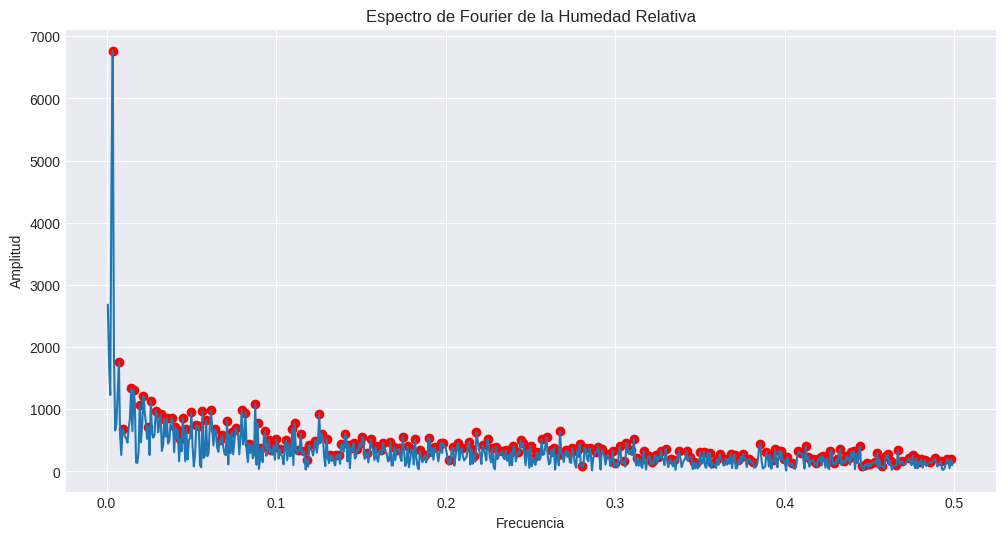

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import find_peaks

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_filtered_humedad.sort_values('FECHA', ascending=True)

# Extraer la serie temporal de la humedad relativa
humidity_series = df_sorted_humedad['RH2M'].values

# Realizar la Transformada de Fourier
fft_values = np.abs(fft(humidity_series - np.mean(humidity_series)))

# Obtener las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(humidity_series))

# Tomar las frecuencias positivas
positive_frequencies = frequencies[np.where(frequencies > 0)]
positive_fft_values = fft_values[np.where(frequencies > 0)]

# Encontrar los picos en el espectro de Fourier
peaks, _ = find_peaks(positive_fft_values)

# Ordenar los picos por amplitud
sorted_peaks = peaks[np.argsort(positive_fft_values[peaks])[::-1]]

# La frecuencia dominante es la que tiene la mayor amplitud
dominant_frequency = positive_frequencies[sorted_peaks[0]]

# Convertir la frecuencia dominante a un periodo
dominant_period = 1 / dominant_frequency

print(f'Periodo dominante estimado: {dominant_period:.2f} días')

# Graficar el espectro de Fourier
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_fft_values)
plt.scatter(positive_frequencies[sorted_peaks], positive_fft_values[sorted_peaks], color='red')
plt.title('Espectro de Fourier de la Humedad Relativa')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

In [ ]:
# Ajuste automático del modelo SARIMA con el periodo dominante estimado
sarima_model_humedad_estimated = auto_arima(df_sorted_humedad['RH2M'],
                                            seasonal=True, m=276,
                                            trace=True, error_action='ignore',
                                            suppress_warnings=True)

# Resumen del mejor modelo encontrado
print(sarima_model_humedad_estimated.summary())

Performing stepwise search to minimize aic


En verdad el periodo dominante es 276 dias lo cual hace sentido porque no tenemos RAM suficiente. Analizando FAC y FACP podemos notar que el lag 3 es mas significativo que otros lags, utilizaremos dicho lag para el modelo.

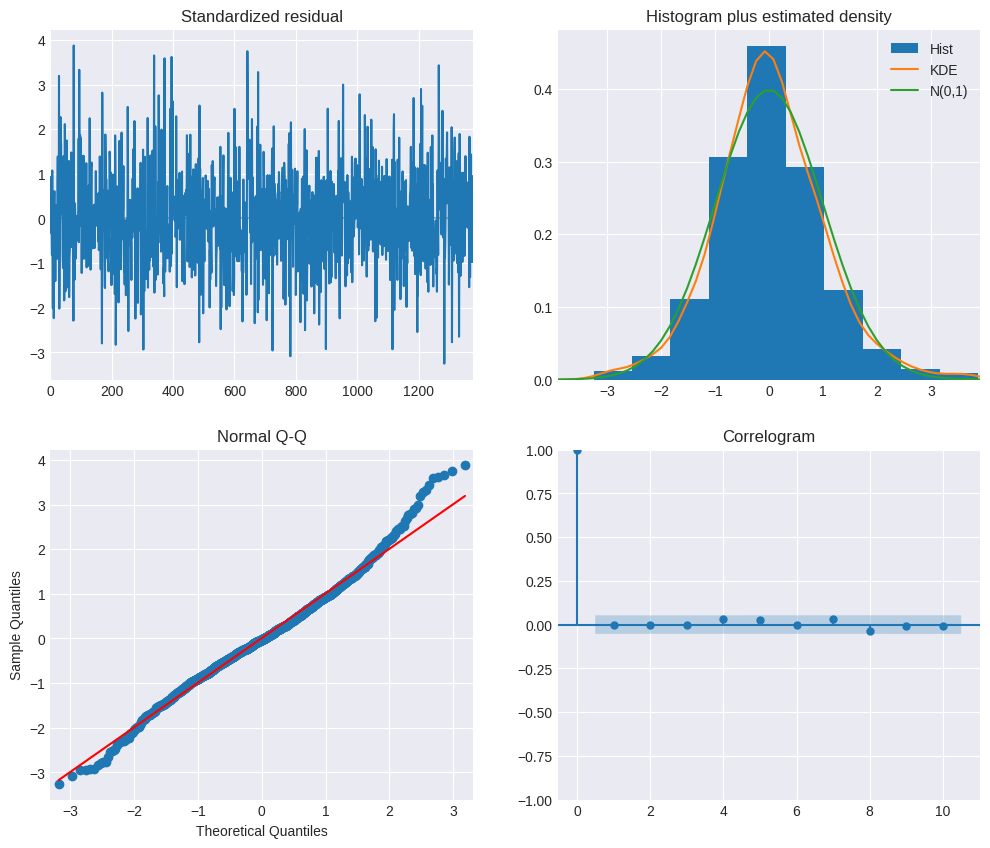

In [ ]:
# Diagnostico grafico los residuos del modelo
fig_res_2 = sarima_model_humedad_m3.plot_diagnostics(figsize=(12,10))

In [23]:
display(df_sorted_humedad)

,FECHA,RH2M
137,2019-11-15,66.94
138,2019-11-16,75.19
141,2019-11-19,73.75
142,2019-11-20,69.25
143,2019-11-21,75.31
...,...,...
1818,2024-06-22,92.94
1820,2024-06-24,81.62
1821,2024-06-25,85.44
1822,2024-06-26,82.25


In [ ]:
from scipy.stats import boxcox
from pmdarima import auto_arima
import pandas as pd
df_sorted_humedad['RH2M_boxcox'], lambda_boxcox = boxcox(df_sorted_humedad['RH2M'])

# Ajuste del modelo ARIMA/SARIMA con los datos transformados
boxcox_model_humedad = auto_arima(df_sorted_humedad['RH2M_boxcox'],
                          seasonal=True, m=3,
                          trace=True, error_action='ignore',
                          suppress_warnings=True)

# Mostrar el resumen del modelo ajustado
print(boxcox_model_humedad.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[3] intercept   : AIC=16973.353, Time=12.26 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=18292.984, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=17040.342, Time=0.70 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=17365.891, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=21677.680, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[3] intercept   : AIC=16951.369, Time=5.51 sec
 ARIMA(2,0,2)(0,0,0)[3] intercept   : AIC=16934.248, Time=3.00 sec
 ARIMA(2,0,2)(1,0,0)[3] intercept   : AIC=17018.026, Time=3.54 sec
 ARIMA(1,0,2)(0,0,0)[3] intercept   : AIC=16945.109, Time=2.10 sec
 ARIMA(2,0,1)(0,0,0)[3] intercept   : AIC=16983.208, Time=2.85 sec
 ARIMA(1,0,1)(0,0,0)[3] intercept   : AIC=17024.840, Time=2.48 sec
 ARIMA(2,0,2)(0,0,0)[3]             : AIC=16943.012, Time=1.21 sec

Best model:  ARIMA(2,0,2)(0,0,0)[3] intercept
Total fit time: 35.261 seconds
                               SARIMAX Results                            

In [ ]:
df_sorted_humedad['RH2M_log'] = np.log(df_sorted_humedad['RH2M'])

# Ajuste del modelo ARIMA/SARIMA con los datos transformados
log_model_humedad = auto_arima(df_sorted_humedad['RH2M_log'],
                       seasonal=True, m=3,
                       trace=True, error_action='ignore',
                       suppress_warnings=True)

# Mostrar el resumen del modelo ajustado
print(log_model_humedad.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=-1806.170, Time=5.76 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=-1571.765, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=-1612.258, Time=0.69 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=-1672.985, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=-1573.765, Time=0.11 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=-1808.271, Time=4.35 sec
 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=-1810.816, Time=2.67 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=-1808.181, Time=5.30 sec
 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=-1804.665, Time=1.63 sec
 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=-1802.274, Time=1.63 sec
 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=-1799.329, Time=1.18 sec
 ARIMA(2,1,2)(0,0,0)[3]             : AIC=-1812.710, Time=0.84 sec
 ARIMA(2,1,2)(1,0,0)[3]             : AIC=-1810.716, Time=1.41 sec
 ARIMA(2,1,2)(0,0,1)[3]             : AIC=-1810.718, Time=1.79 sec
 ARIMA(2,1,2)(1,0,1

In [24]:
display(df_sorted_humedad)

,FECHA,RH2M
137,2019-11-15,66.94
138,2019-11-16,75.19
141,2019-11-19,73.75
142,2019-11-20,69.25
143,2019-11-21,75.31
...,...,...
1818,2024-06-22,92.94
1820,2024-06-24,81.62
1821,2024-06-25,85.44
1822,2024-06-26,82.25


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asegurarse de que la columna 'FECHA' es tipo datetime
df_sorted_humedad['FECHA'] = pd.to_datetime(df_sorted_humedad['FECHA'])

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_sorted_humedad.sort_values('FECHA', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_sorted_humedad) * 0.8)
train, test = df_sorted_humedad.iloc[:train_size].copy(), df_sorted_humedad.iloc[train_size:].copy()

# Aplicar la transformación logarítmica
train['RH2M_log'] = np.log(train['RH2M'])
test['RH2M_log'] = np.log(test['RH2M'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento con la transformación logarítmica
log_model_with_train = auto_arima(train['RH2M_log'],
                                  seasonal=True, m=3,
                                  trace=True, error_action='ignore',
                                  suppress_warnings=True)

# Resumen del modelo ajustado
print(log_model_with_train.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=-1429.308, Time=5.49 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=-1243.471, Time=0.37 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=-1276.743, Time=1.24 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=-1326.485, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=-1245.469, Time=0.17 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=-1430.323, Time=3.53 sec
 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=-1432.161, Time=1.61 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=-1430.278, Time=3.14 sec
 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=-1431.279, Time=2.48 sec
 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=-1429.603, Time=2.29 sec
 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=-1426.353, Time=1.94 sec
 ARIMA(2,1,2)(0,0,0)[3]             : AIC=-1434.112, Time=0.70 sec
 ARIMA(2,1,2)(1,0,0)[3]             : AIC=-1432.284, Time=1.15 sec
 ARIMA(2,1,2)(0,0,1)[3]             : AIC=-1432.331, Time=1.13 sec
 ARIMA(2,1,2)(1,0,1

In [ ]:

# Ajustar el modelo SARIMA usando statsmodels en el conjunto de entrenamiento
log_model = SARIMAX(train['RH2M_log'],
                    order=log_model_with_train.order,
                    seasonal_order=log_model_with_train.seasonal_order)
log_model_fit = log_model.fit(disp=False)

# Realizar predicciones en el conjunto de prueba
predictions_log = log_model_fit.get_forecast(steps=len(test))
predicted_log_values = predictions_log.predicted_mean
predicted_values = np.exp(predicted_log_values)  # Invertir la transformación logarítmica

# Evaluar las predicciones
mse = mean_squared_error(test['RH2M'], predicted_values)
mae = mean_absolute_error(test['RH2M'], predicted_values)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 281.2846102343148
MAE: 13.69122772794182


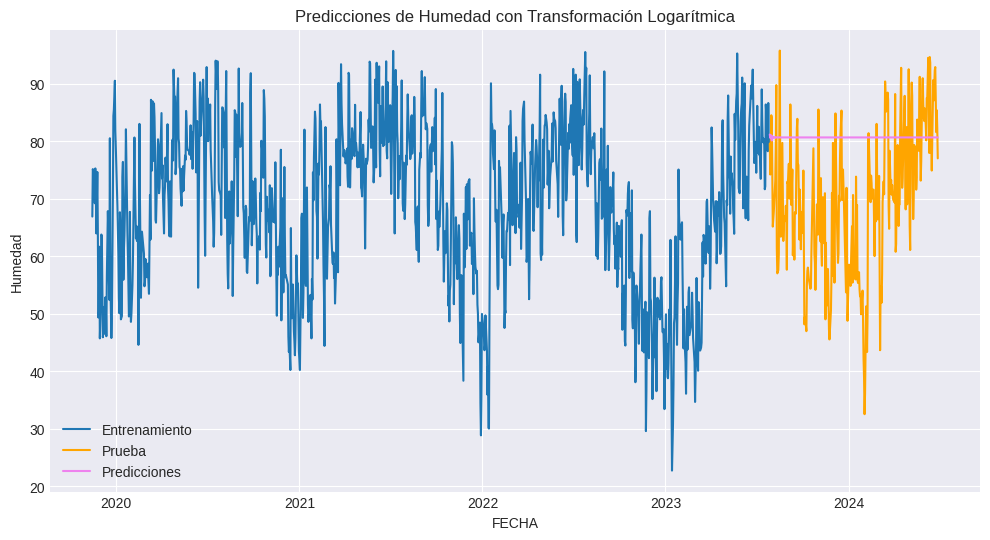

In [ ]:
# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.plot(train['FECHA'], train['RH2M'], label='Entrenamiento')
plt.plot(test['FECHA'], test['RH2M'], label='Prueba', color='orange')
plt.plot(test['FECHA'], predicted_values, label='Predicciones', color='violet')
plt.xlabel('FECHA')
plt.ylabel('Humedad')
plt.title('Predicciones de Humedad con Transformación Logarítmica')
plt.legend()
plt.show()

In [ ]:
# Verificar las columnas disponibles en el DataFrame
print(df_sorted_humedad.columns)

Index(['RH2M'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asegurarse de que la columna 'FECHA' es tipo datetime
df_sorted_humedad['FECHA'] = pd.to_datetime(df_sorted_humedad['FECHA'])

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_sorted_humedad.sort_values('FECHA', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_sorted_humedad) * 0.8)
train, test = df_sorted_humedad.iloc[:train_size].copy(), df_sorted_humedad.iloc[train_size:].copy()

# Aplicar la transformación logarítmica
train['RH2M_log'] = np.log(train['RH2M'])
test['RH2M_log'] = np.log(test['RH2M'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento con la transformación logarítmica
log_model_with_train = auto_arima(train['RH2M_log'],
                                  seasonal=True, m=3,
                                  trace=True, error_action='ignore',
                                  suppress_warnings=True)

# Resumen del modelo ajustado
print(log_model_with_train.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=-1429.308, Time=9.75 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=-1243.471, Time=0.40 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=-1276.743, Time=1.25 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=-1326.485, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=-1245.469, Time=0.12 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=-1430.323, Time=3.52 sec
 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=-1432.161, Time=1.56 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=-1430.278, Time=3.20 sec
 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=-1431.279, Time=2.43 sec
 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=-1429.603, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=-1426.353, Time=2.23 sec
 ARIMA(2,1,2)(0,0,0)[3]             : AIC=-1434.112, Time=0.76 sec
 ARIMA(2,1,2)(1,0,0)[3]             : AIC=-1432.284, Time=1.19 sec
 ARIMA(2,1,2)(0,0,1)[3]             : AIC=-1432.331, Time=1.13 sec
 ARIMA(2,1,2)(1,0,1

In [ ]:
display(df_sorted_humedad)

,FECHA,RH2M
137,2019-11-15,66.94
138,2019-11-16,75.19
141,2019-11-19,73.75
142,2019-11-20,69.25
143,2019-11-21,75.31
...,...,...
1818,2024-06-22,92.94
1820,2024-06-24,81.62
1821,2024-06-25,85.44
1822,2024-06-26,82.25


In [ ]:
# Predicciones con rolling forecast
predictions_log = []
history = list(train['RH2M_log'])
for t in range(len(test)):
    model = log_model_with_train.fit(history)
    yhat = model.predict(n_periods=1)
    predictions_log.append(yhat[0])
    # Actualizar el historial con el valor real transformado (log)
    actual_transformed = np.log(test['RH2M'].iloc[t])
    history.append(actual_transformed)

# Invertir la transformación logarítmica en las predicciones
predictions = np.exp(predictions_log)

# Calcular las métricas de performance
rmse = np.sqrt(mean_squared_error(test['RH2M'], predictions))
mae = mean_absolute_error(test['RH2M'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 8.305172813660949
MAE: 6.417359367592846


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=-1429.308, Time=10.69 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=-1243.471, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=-1276.743, Time=0.65 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=-1326.485, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=-1245.469, Time=0.12 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=-1430.323, Time=3.17 sec
 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=-1432.161, Time=1.59 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=-1430.278, Time=5.36 sec
 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=-1431.279, Time=2.44 sec
 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=-1429.603, Time=1.44 sec
 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=-1426.353, Time=1.05 sec
 ARIMA(2,1,2)(0,0,0)[3]             : AIC=-1434.112, Time=0.69 sec
 ARIMA(2,1,2)(1,0,0)[3]             : AIC=-1432.284, Time=1.19 sec
 ARIMA(2,1,2)(0,0,1)[3]             : AIC=-1432.331, Time=1.10 sec
 ARIMA(2,1,2)(1,0,

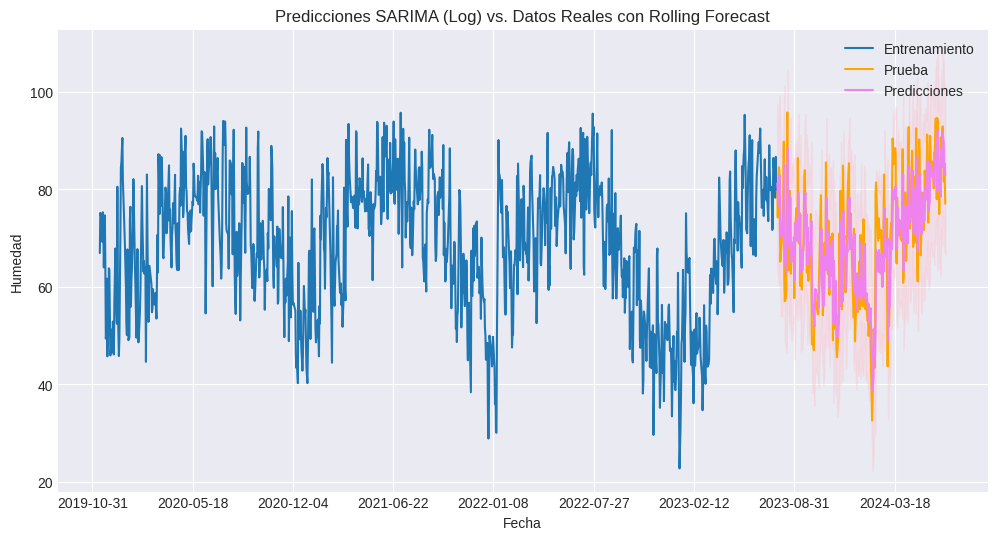

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Asegurarse de que la columna 'FECHA' es tipo datetime
df_sorted_humedad['FECHA'] = pd.to_datetime(df_sorted_humedad['FECHA'])

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_sorted_humedad.sort_values('FECHA', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_sorted_humedad) * 0.8)
train, test = df_sorted_humedad.iloc[:train_size].copy(), df_sorted_humedad.iloc[train_size:].copy()

# Aplicar la transformación logarítmica a los datos de entrenamiento
train['RH2M_log'] = np.log(train['RH2M'])
test['RH2M_log'] = np.log(test['RH2M'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento transformado
log_rolling_forecast_model = auto_arima(train['RH2M_log'],
                                        seasonal=True, m=3,
                                        trace=True, error_action='ignore',
                                        suppress_warnings=True)

# Predicciones con rolling forecast
predictions_log = []
history = list(train['RH2M_log'])
for t in range(len(test)):
    model = log_rolling_forecast_model.fit(history)
    yhat = model.predict(n_periods=1)
    predictions_log.append(yhat[0])
    # Actualizar el historial con el valor real transformado (log)
    actual_transformed = np.log(test['RH2M'].iloc[t])
    history.append(actual_transformed)

# Invertir la transformación logarítmica en las predicciones
predictions = np.exp(predictions_log)

# Calcular las métricas de performance
rmse = np.sqrt(mean_squared_error(test['RH2M'], predictions))
mae = mean_absolute_error(test['RH2M'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

import matplotlib.ticker as ticker

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train['FECHA'], train['RH2M'], label='Entrenamiento')
plt.plot(test['FECHA'], test['RH2M'], label='Prueba', color='orange')
plt.plot(test['FECHA'], predictions, label='Predicciones', color='violet')
plt.fill_between(test['FECHA'], predictions - 1.96 * rmse, predictions + 1.96 * rmse, color='pink', alpha=0.3)

# Formatear los ejes para evitar notación científica
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Predicciones SARIMA (Log) vs. Datos Reales con Rolling Forecast')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_sorted_humedad.sort_values('FECHA', ascending=True)

# Separar el dataset en entrenamiento (80%) y prueba (20%)
train_size = int(len(df_sorted_humedad) * 0.8)
train, test = df_sorted_humedad.iloc[:train_size], df_sorted_humedad.iloc[train_size:]

# Aplicar la transformación logarítmica a los datos de entrenamiento
train_log = np.log(train['RH2M'])

# Ajuste del modelo SARIMA en el conjunto de entrenamiento transformado
log_rolling_forecast_model = auto_arima(train_log,
                                        seasonal=True, m=3,
                                        trace=True, error_action='ignore',
                                        suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=-1429.308, Time=5.40 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=-1243.471, Time=0.40 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=-1276.743, Time=1.22 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=-1326.485, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=-1245.469, Time=0.17 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=-1430.323, Time=3.31 sec
 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=-1432.161, Time=1.65 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=-1430.278, Time=3.09 sec
 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=-1431.279, Time=2.37 sec
 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=-1429.603, Time=2.51 sec
 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=-1426.353, Time=1.86 sec
 ARIMA(2,1,2)(0,0,0)[3]             : AIC=-1434.112, Time=0.69 sec
 ARIMA(2,1,2)(1,0,0)[3]             : AIC=-1432.284, Time=1.13 sec
 ARIMA(2,1,2)(0,0,1)[3]             : AIC=-1432.331, Time=1.08 sec
 ARIMA(2,1,2)(1,0,1

In [ ]:
# Predicciones con rolling forecast
predictions_log = []
history = list(train_log)
for t in range(len(test)):
    model = log_rolling_forecast_model.fit(history)
    yhat = model.predict(n_periods=1)
    predictions_log.append(yhat[0])
    # Actualizar el historial con el valor real transformado (log)
    actual_transformed = np.log(test['RH2M'].iloc[t])
    history.append(actual_transformed)

# Invertir la transformación logarítmica en las predicciones
predictions = np.exp(predictions_log)

# Calcular las métricas de performance
rmse = np.sqrt(mean_squared_error(test['RH2M'], predictions))
mae = mean_absolute_error(test['RH2M'], predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 8.305172813660949
MAE: 6.417359367592846


In [ ]:
display(df_sorted_humedad)

,FECHA,RH2M,RH2M_log
137,2019-11-15,66.94,4.20
138,2019-11-16,75.19,4.32
141,2019-11-19,73.75,4.30
142,2019-11-20,69.25,4.24
143,2019-11-21,75.31,4.32
...,...,...,...
1818,2024-06-22,92.94,4.53
1820,2024-06-24,81.62,4.40
1821,2024-06-25,85.44,4.45
1822,2024-06-26,82.25,4.41


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox

# Ordenar el DataFrame por fecha
df_sorted_humedad = df_filtered_humedad.sort_values('FECHA', ascending=True)

# Aplicar la transformación logarítmica
df_sorted_humedad['RH2M_log'] = np.log(df_sorted_humedad['RH2M'])

# Definir la función para el pronóstico con Rolling Forecast usando Log
def rolling_forecast_log(model, train, steps=78):
    history = list(train['RH2M_log'])
    predictions = []
    conf_ints = []

    for t in range(steps):
        model_fit = model.fit(history)
        yhat, conf_int = model_fit.predict(n_periods=1, return_conf_int=True)
        predictions.append(yhat[0])
        conf_ints.append(conf_int[0])
        actual_transformed = np.log(train['RH2M'].iloc[-steps + t])  # Transformar y agregar al historial
        history.append(actual_transformed)

    return predictions, conf_ints

# Ajuste automático del modelo SARIMA con transformación Log
log_rolling_forecast_model = auto_arima(df_sorted_humedad['RH2M_log'],
                                        seasonal=True, m=3,
                                        trace=True, error_action='ignore',
                                        suppress_warnings=True)

# Realizar el pronóstico para los próximos 30 días
future_predictions_log, conf_ints_log = rolling_forecast_log(log_rolling_forecast_model, df_sorted_humedad, steps=78)
future_predictions_log_inverse = np.exp(future_predictions_log)  # Invertir la transformación logarítmica

# Crear un rango de fechas para las predicciones futuras
last_date = df_sorted_humedad['FECHA'].max()
future_dates = pd.date_range(start=last_date, periods=79, freq='B')[1:]  # Saltar el primer día para empezar después del último dato conocido

# Crear DataFrame para las predicciones futuras
future_df_log = pd.DataFrame({'FECHA': future_dates, 'Predicciones': future_predictions_log_inverse})

# Invertir la transformación logarítmica en los intervalos de confianza
conf_ints_log_inverse = np.exp(np.array(conf_ints_log).flatten())
conf_ints_log_inverse = conf_ints_log_inverse.reshape(-1, 2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=-1806.170, Time=6.77 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=-1571.765, Time=0.22 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=-1612.258, Time=0.68 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=-1672.985, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=-1573.765, Time=0.11 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=-1808.271, Time=4.24 sec
 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=-1810.816, Time=2.64 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=-1808.181, Time=5.21 sec
 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=-1804.665, Time=1.63 sec
 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=-1802.274, Time=1.61 sec
 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=-1799.329, Time=1.23 sec
 ARIMA(2,1,2)(0,0,0)[3]             : AIC=-1812.710, Time=0.86 sec
 ARIMA(2,1,2)(1,0,0)[3]             : AIC=-1810.716, Time=1.53 sec
 ARIMA(2,1,2)(0,0,1)[3]             : AIC=-1810.718, Time=1.82 sec
 ARIMA(2,1,2)(1,0,1

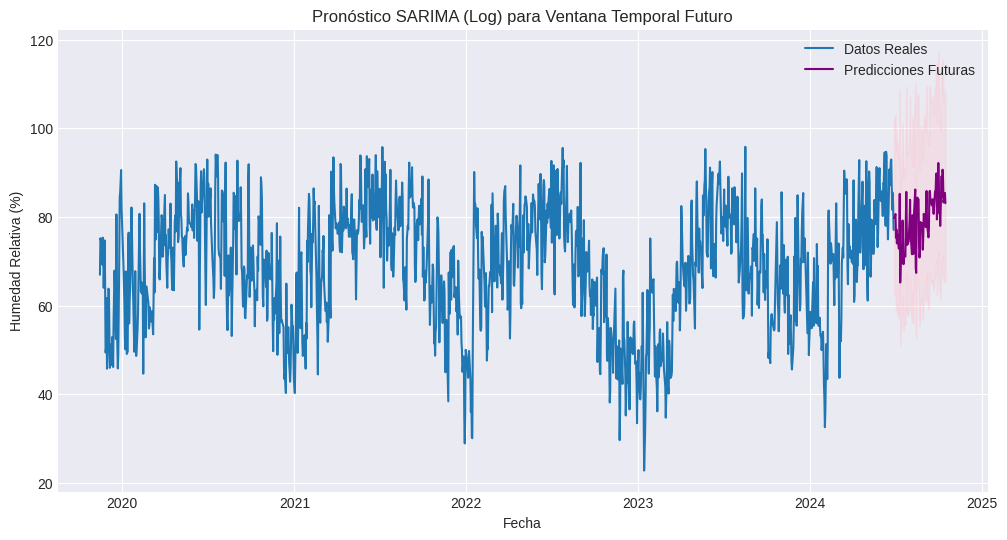

In [27]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df_sorted_humedad['FECHA'], df_sorted_humedad['RH2M'], label='Datos Reales')
plt.plot(future_df_log['FECHA'], future_df_log['Predicciones'], label='Predicciones Futuras', color='purple')
plt.fill_between(future_df_log['FECHA'], conf_ints_log_inverse[:, 0], conf_ints_log_inverse[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Humedad Relativa (%)')
plt.title('Pronóstico SARIMA (Log) para Ventana Temporal Futuro')
plt.legend()
plt.show()